In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
suffix = '1H_20180501_20201101'
#suffix = '3H_20180501_20201101'
#suffix = '1W_20180501_20201101'
df = pd.read_csv('../data/kaiterra/kaiterra_fieldeggid_{}.csv'.format(suffix), index_col=[0,1], parse_dates=True)

In [3]:
df.sort_index(inplace=True)
df

pm25  pm10
field_egg_id timestamp_round                      
113E         2018-05-01 00:00:00+05:30   NaN   NaN
             2018-05-01 01:00:00+05:30   NaN   NaN
             2018-05-01 02:00:00+05:30   NaN   NaN
             2018-05-01 03:00:00+05:30   NaN   NaN
             2018-05-01 04:00:00+05:30   NaN   NaN
...                                      ...   ...
EAC8         2020-10-31 19:00:00+05:30   NaN   NaN
             2020-10-31 20:00:00+05:30   NaN   NaN
             2020-10-31 21:00:00+05:30   NaN   NaN
             2020-10-31 22:00:00+05:30   NaN   NaN
             2020-10-31 23:00:00+05:30   NaN   NaN

[614880 rows x 2 columns]

In [4]:
locs_df = pd.read_csv('../data/kaiterra/kaiterra_locations.csv', index_col=0)

In [5]:
locs_df

,udid,latitude,longitude,location
udid_short,,,,
BB4A,492457f434f94afc865bb4701990bb4a,28.554980,77.194430,Jamun
91B8,ea3ceeefd9654dfd9aab41422f7391b8,28.503050,77.185660,Vihara
BC46,29b8262425cf4135899cd65b2458bc46,28.632950,77.288700,Segel Design
BFDC,11047d2ddc514f63a12ad4f1ad3bbfdc,28.521083,77.214237,Arundhati
D804,f083e8afd43e4727a5eb7f3a1529d804,28.558230,77.208620,EPoD
72CA,b66ca02049354db8a50230554cb572ca,28.455966,77.315964,Lejo
CBC7,bc4be63a6400404f89e46b6c4df1cbc7,28.601407,77.185708,U.S. Embassy
20CA,727e3a5c71f6452d91e8c6d0958920ca,28.574575,77.161071,Arun Duggal
C0A7,9a4b19a6bd284bfdb20f43ca1aa4c0a7,28.415079,77.043530,Nischal


In [6]:
sensor = 'pm25'

In [7]:
# select training period only
df_train = df.loc[(slice(None), slice(pd.Timestamp('2018-05-01 00:00:00+05:30'), pd.Timestamp('2019-09-30 23:00:00+05:30'))),:]
df_train

pm25       pm10
field_egg_id timestamp_round                                
113E         2018-05-01 00:00:00+05:30        NaN        NaN
             2018-05-01 01:00:00+05:30        NaN        NaN
             2018-05-01 02:00:00+05:30        NaN        NaN
             2018-05-01 03:00:00+05:30        NaN        NaN
             2018-05-01 04:00:00+05:30        NaN        NaN
...                                           ...        ...
EAC8         2019-09-30 19:00:00+05:30  32.500000  38.916667
             2019-09-30 20:00:00+05:30  43.833333  55.583333
             2019-09-30 21:00:00+05:30  46.181818  57.090909
             2019-09-30 22:00:00+05:30  46.111111  57.111111
             2019-09-30 23:00:00+05:30  39.090909  46.000000

[348096 rows x 2 columns]

In [8]:
# select test period only
df_test = df.loc[(slice(None), slice(pd.Timestamp('2019-10-01 00:00:00+05:30'), pd.Timestamp('2020-01-31 23:00:00+05:30'))),:]
df_test

pm25        pm10
field_egg_id timestamp_round                                  
113E         2019-10-01 00:00:00+05:30         NaN         NaN
             2019-10-01 01:00:00+05:30         NaN         NaN
             2019-10-01 02:00:00+05:30         NaN         NaN
             2019-10-01 03:00:00+05:30         NaN         NaN
             2019-10-01 04:00:00+05:30         NaN         NaN
...                                            ...         ...
EAC8         2020-01-31 19:00:00+05:30  124.916667  170.250000
             2020-01-31 20:00:00+05:30  123.000000  166.666667
             2020-01-31 21:00:00+05:30  157.200000  213.300000
             2020-01-31 22:00:00+05:30  153.833333  207.000000
             2020-01-31 23:00:00+05:30  138.083333  186.583333

[82656 rows x 2 columns]

In [9]:
print(df_train.pm25.count())
print(df_test.pm25.count())

166979
20408


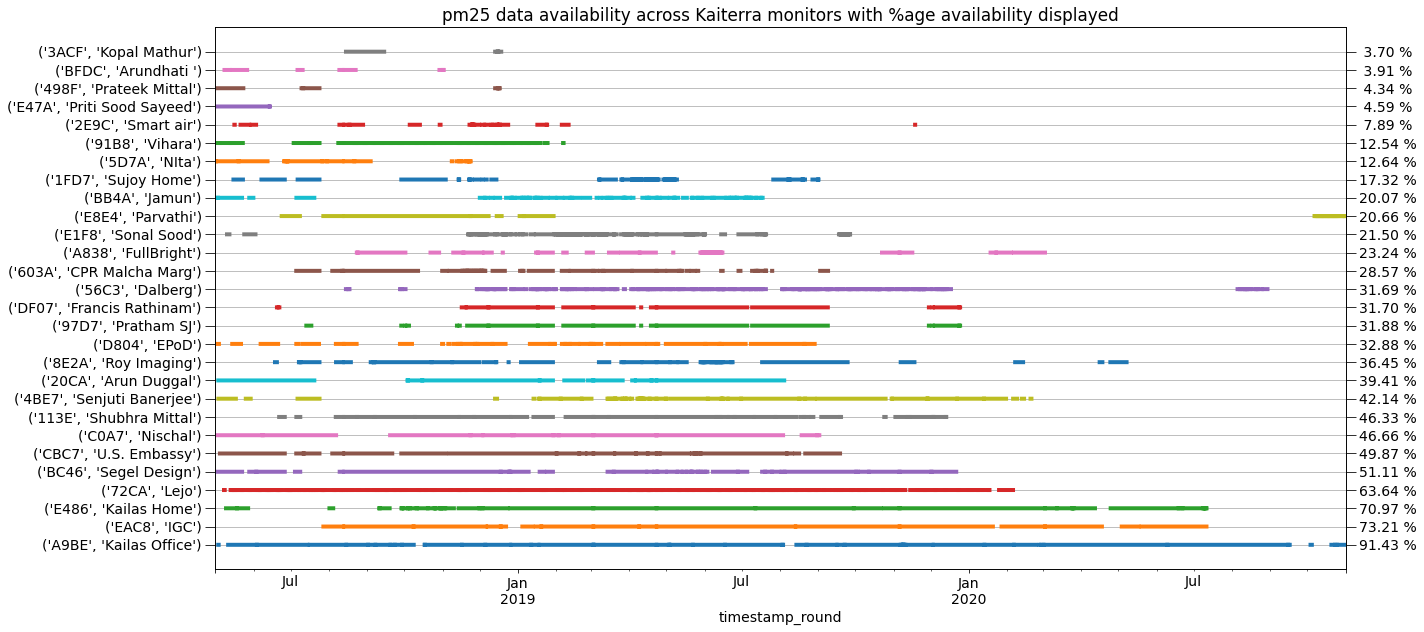

In [10]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped[sensor].count() / grouped[sensor].size())
validfracs.sort_values(ascending=False, inplace=True)

plt.rc('font', size=14)

fig = plt.figure(figsize=(20,9))
ax = fig.add_subplot(111)

for count, name in enumerate(validfracs.index, 1):
    # plot the data availability
    group = grouped.get_group(name)
    group.reset_index(level=0, drop=True, inplace=True)
    group[sensor].where(np.isnan(group[sensor]), other=count).plot(lw=4)

ax.set_yticks(np.arange(1,count+1))
#ax.set_yticklabels([(name, grouped.get_group(name).location[0]) for name in validfracs.index])
ax.set_yticklabels([(name, locs_df.location[name]) for name in validfracs.index])
ax.tick_params(axis='y', right=0, left=1, length=10)
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(ax.get_yticks())
ax2.set_yticklabels(['{:5.2f} %'.format(val*100) for val in validfracs])
ax2.tick_params(axis='y', right=1, left=0, length=10)
ax.set_title('{} data availability across Kaiterra monitors with %age availability displayed'.format(sensor))
ax.grid(axis='y')
fig.tight_layout()
plt.show()

In [11]:
validfracs

field_egg_id
A9BE    0.914344
EAC8    0.732104
E486    0.709745
72CA    0.636384
BC46    0.511066
CBC7    0.498725
C0A7    0.466576
113E    0.463251
4BE7    0.421357
20CA    0.394126
8E2A    0.364526
D804    0.328780
97D7    0.318807
DF07    0.317031
56C3    0.316894
603A    0.285701
A838    0.232377
E1F8    0.214982
E8E4    0.206648
BB4A    0.200683
1FD7    0.173224
5D7A    0.126412
91B8    0.125364
2E9C    0.078916
E47A    0.045947
498F    0.043443
BFDC    0.039117
3ACF    0.037022
Name: pm25, dtype: float64

In [12]:
#fig.savefig('data/datagaps_kaiterra_fieldeggs_{}_long.png'.format(suffix))
#fig.savefig('data/datagaps_kaiterra_fieldeggs_{}_long.pdf'.format(suffix))
savepath = '../figures/datagaps_{}_kaiterra_fieldeggs_{}'.format(sensor, suffix)
fig.savefig(savepath + '.png')
fig.savefig(savepath + '.pdf')
validfracs.to_csv(savepath + '.csv', float_format='%.4f', header=True)
plt.close(fig)

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:35: MatplotlibDeprecationWarning: Mathtext using only standard PostScript fonts has been likely to produce wrong output for a while, has been deprecated in 3.4 and will be removed in in 3.5, after which ps.useafm will have no effect on mathtext.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


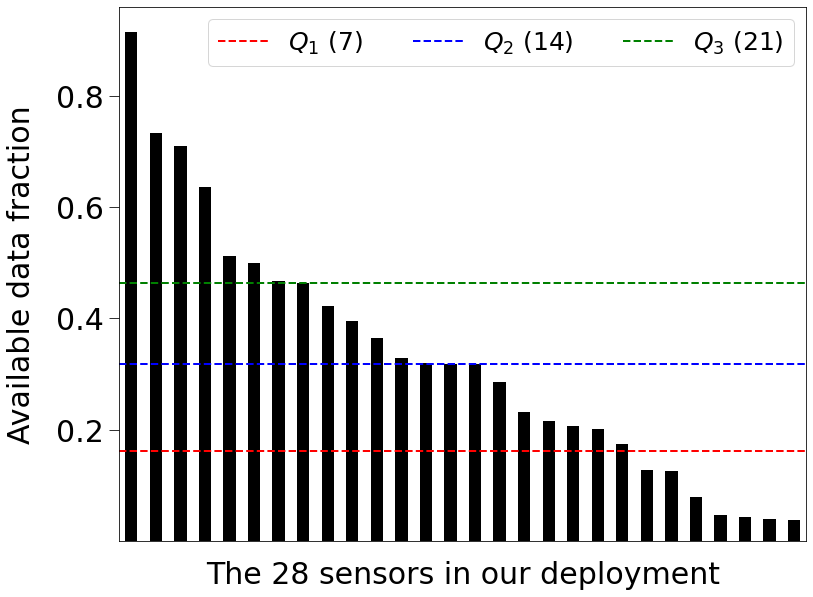

In [13]:
# display availability based on percent counts
grouped = df.groupby(level=0)
validfracs = (grouped.pm25.count() / grouped.pm25.size())
validfracs.sort_values(ascending=False, inplace=True)

pt1 = np.percentile(validfracs.values, 25)
pt2 = np.percentile(validfracs.values, 50)
pt3 = np.percentile(validfracs.values, 75)

n1 = validfracs.size // 4
n2 = 2*n1
n3 = 3*n1

plt.rc('font', size=30)
plt.rc('ps', useafm=True)
plt.rc('pdf', use14corefonts=True)

plt.figure(figsize=(12,9))
# validfracs.plot(kind='hist', bins=30)
# plt.xlim(0,1)
validfracs.plot(kind='bar', color='k', label='')
# plt.bar(validfracs.values, color='k')
xmin, xmax = plt.xlim()
plt.hlines([pt1], xmin, xmax, colors='r', linestyles='--', lw=2, label=r'$Q_1$ ({})'.format(n1))
plt.hlines([pt2], xmin, xmax, colors='b', linestyles='--', lw=2, label=r'$Q_2$ ({})'.format(n2))
plt.hlines([pt3], xmin, xmax, colors='g', linestyles='--', lw=2, label=r'$Q_3$ ({})'.format(n3))
plt.xlim(xmin, xmax)
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(6, prune='both'))
plt.tick_params(length=10, pad=5, labelbottom=0, bottom=0)
plt.xlabel('The {} sensors in our deployment'.format(validfracs.size), labelpad=20)
plt.ylabel('Available data fraction', labelpad=20)
plt.legend(ncol=3, fontsize='small')
plt.tight_layout()
#plt.savefig('data/datagaps_kaiterra_fieldeggs_2019_Feb_28_bar.eps')
plt.savefig('../figures/datagaps_kaiterra_fieldeggs_{}_bar.eps'.format(suffix))
plt.savefig('../figures/datagaps_kaiterra_fieldeggs_{}_bar.pdf'.format(suffix))
plt.show()

In [14]:
plt.close('all')